In [3]:
%load_ext autoreload
%autoreload 2

import nonlinear_benchmarks
train_val, test = nonlinear_benchmarks.WienerHammerBenchMark()

print(train_val) 
print(test)

sampling_time = train_val.sampling_time # in seconds
u_train, y_train = train_val            # to unpack or use train_val.u, train_val.y
u_test, y_test   = test                 # to unpack or use test.u,      test.y
print(test.state_initialization_window_length) 
print(train_val[:100])                  # creates a slice of the train_val data from 0 to 100

type(train_val)


Input_output_data "train WH" u.shape=(100000,) y.shape=(100000,) sampling_time=1.953e-05
Input_output_data "test WH" u.shape=(78800,) y.shape=(78800,) sampling_time=1.953e-05 state_initialization_window_length=50
50
Input_output_data u.shape=(100,) y.shape=(100,) sampling_time=1.953e-05


nonlinear_benchmarks.utilities.Input_output_data

---CED---
M train_val 2, M test 2


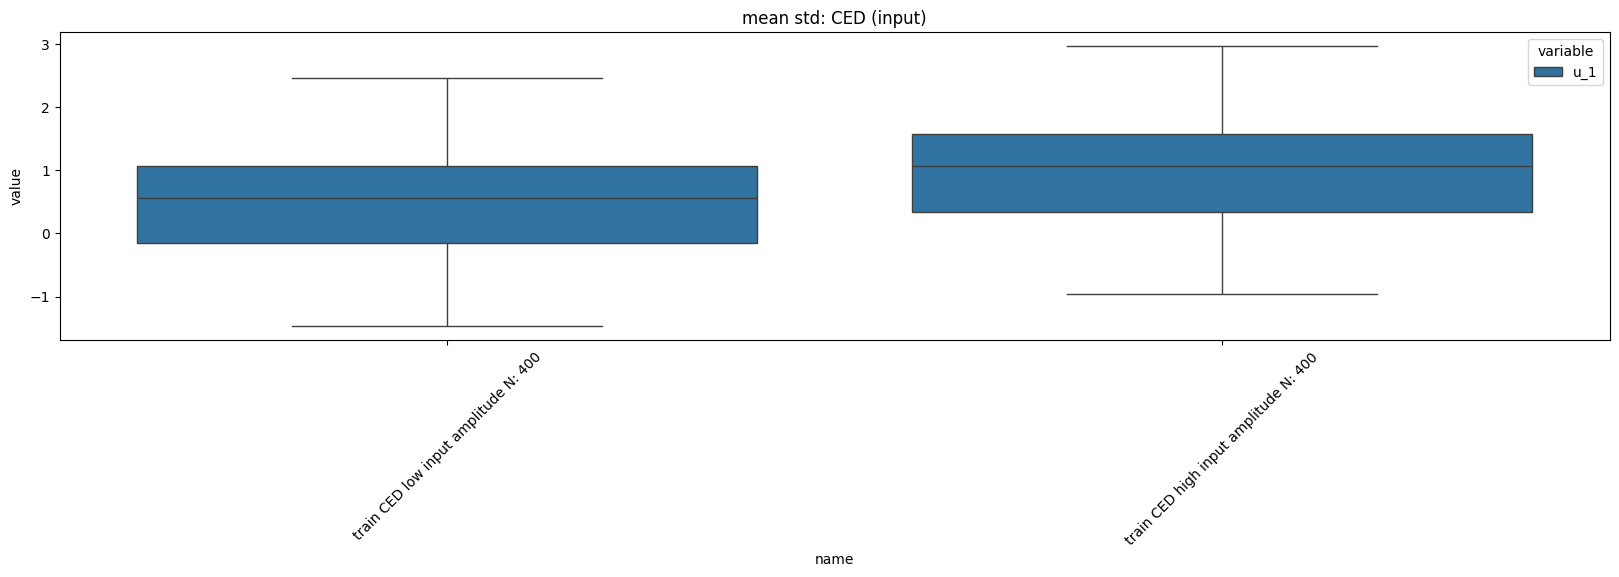

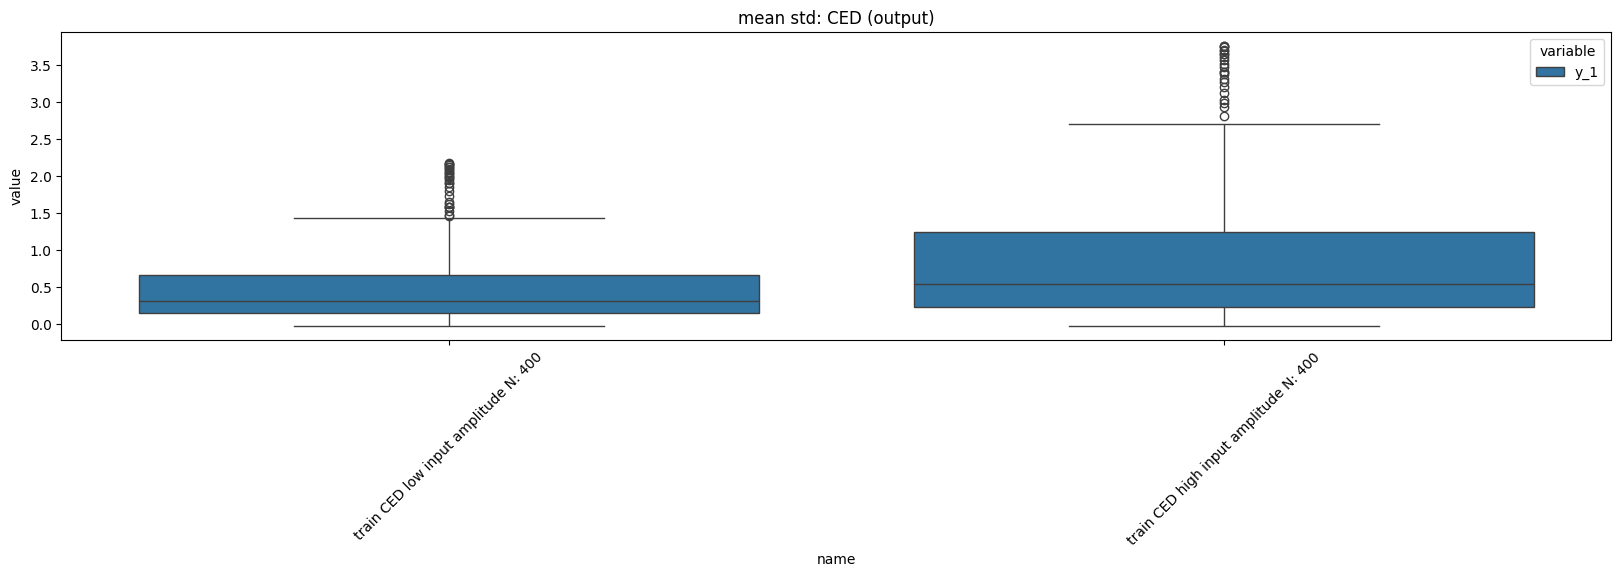

---Cascaded_Tanks---
M train_val 1, M test 1


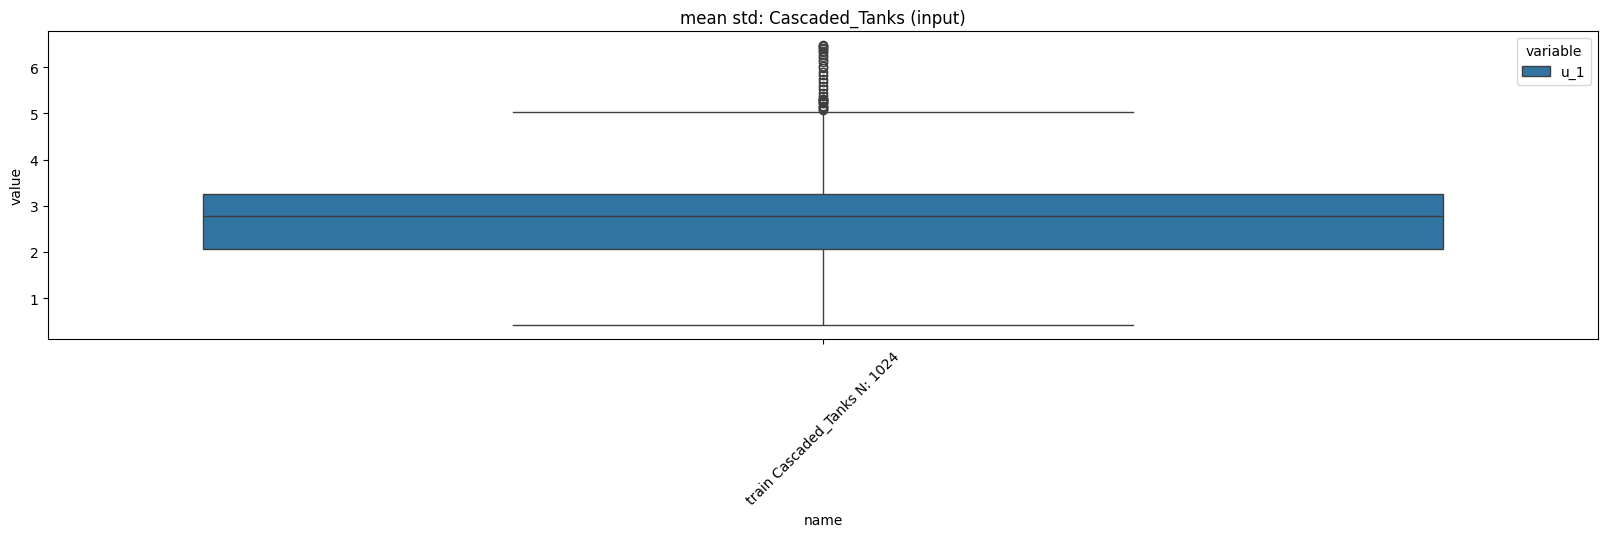

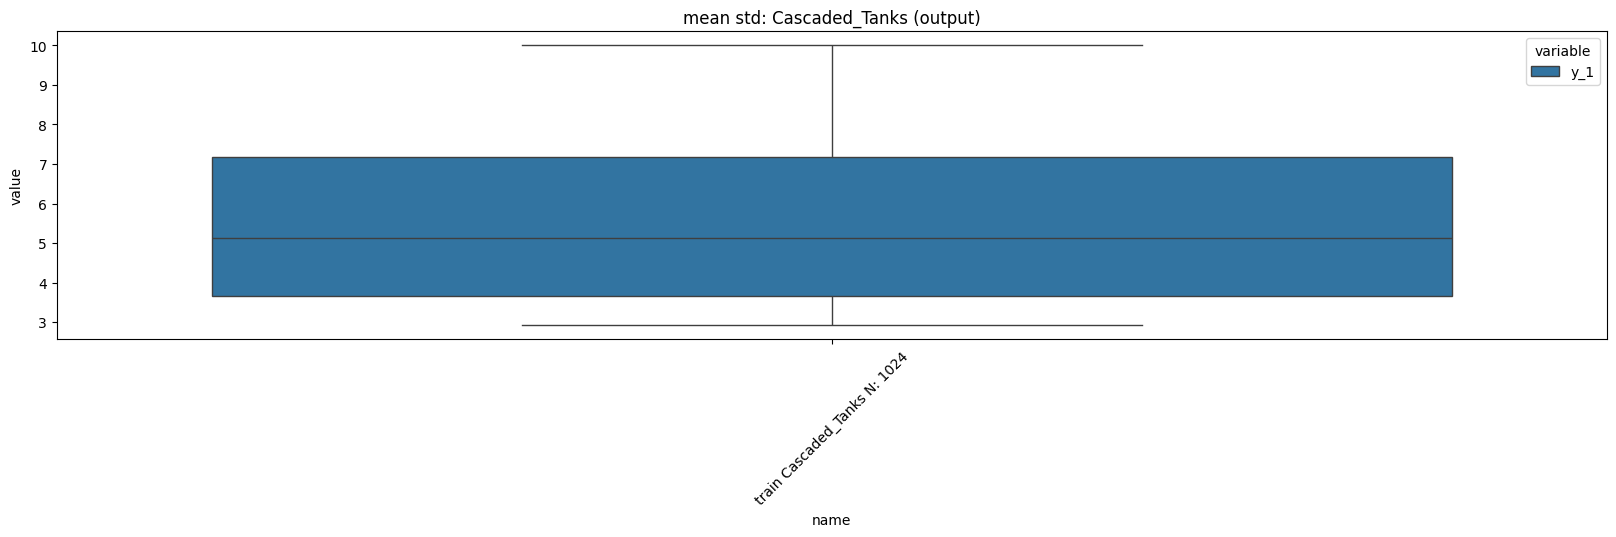

---EMPS---
M train_val 1, M test 1


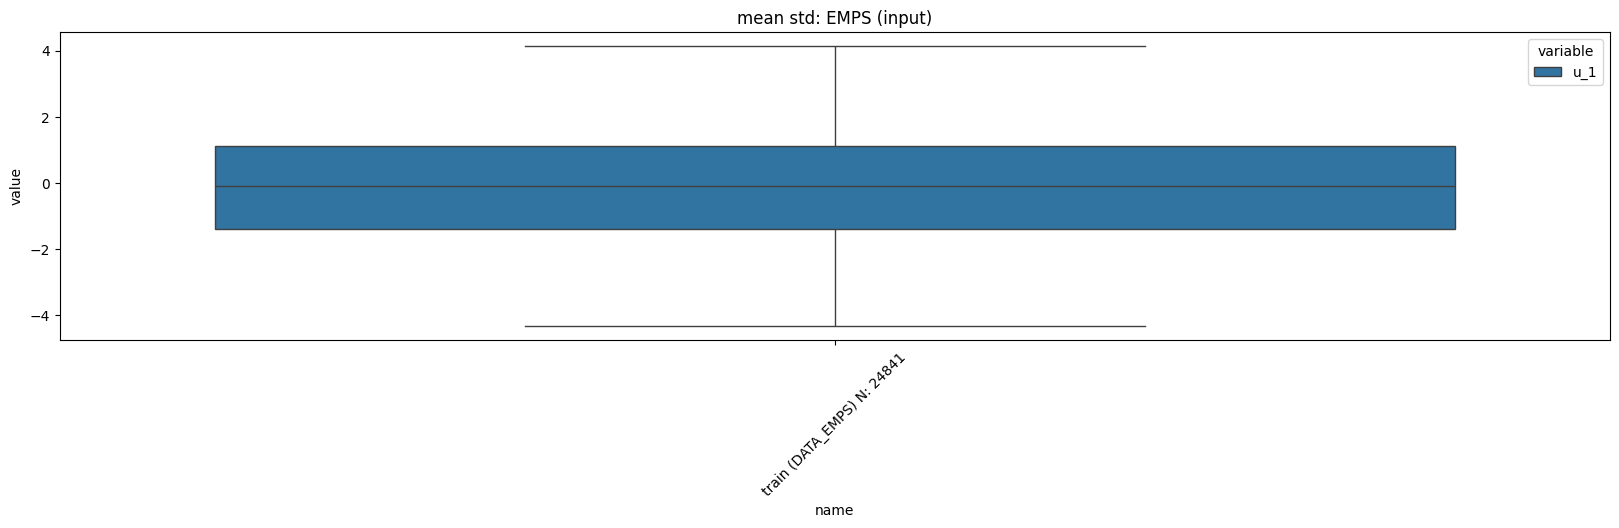

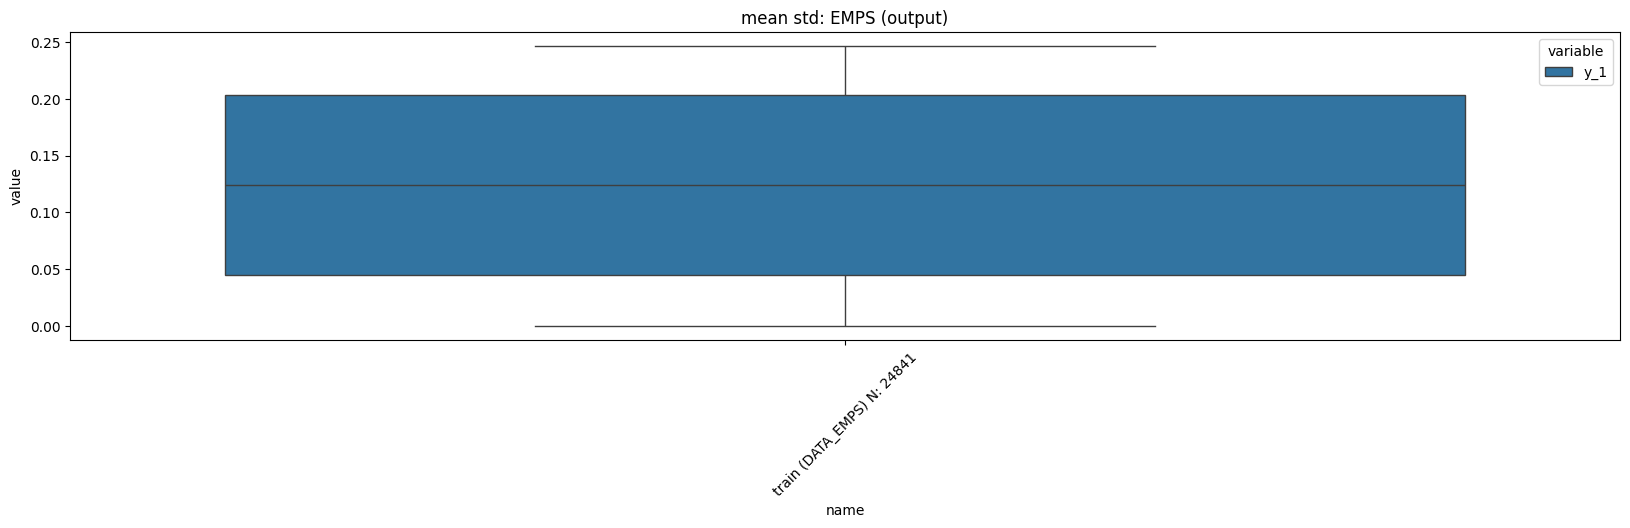

---Silverbox---
M train_val 1, M test 3


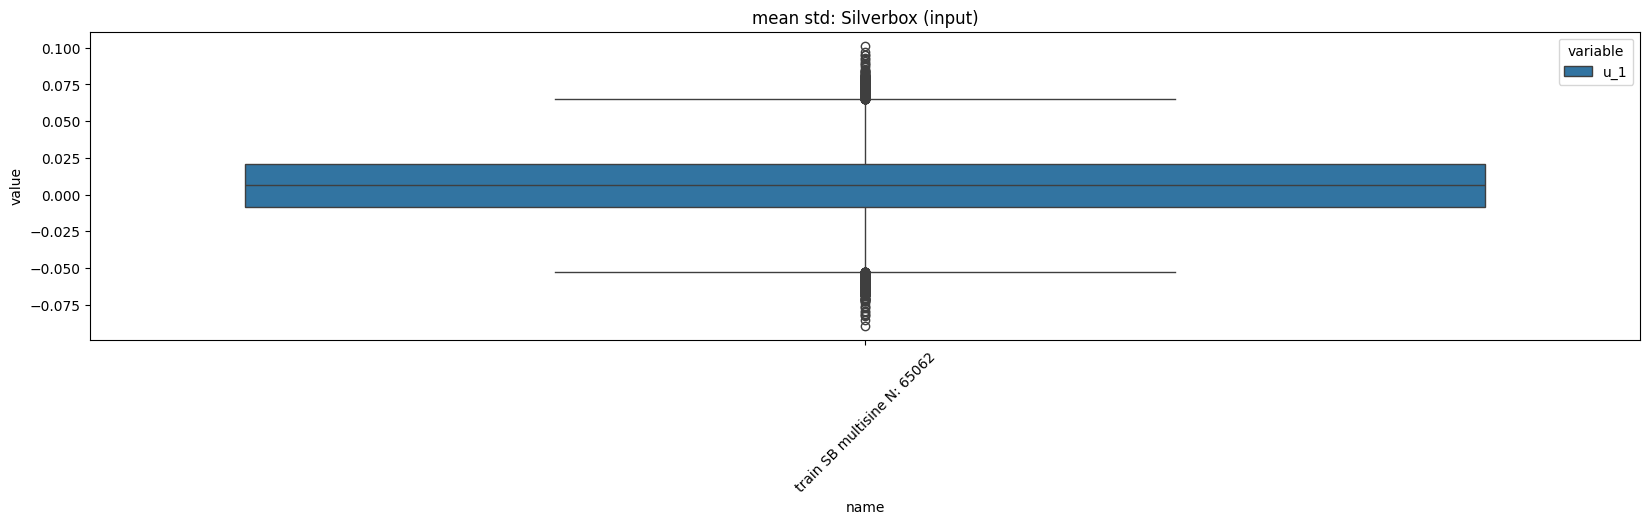

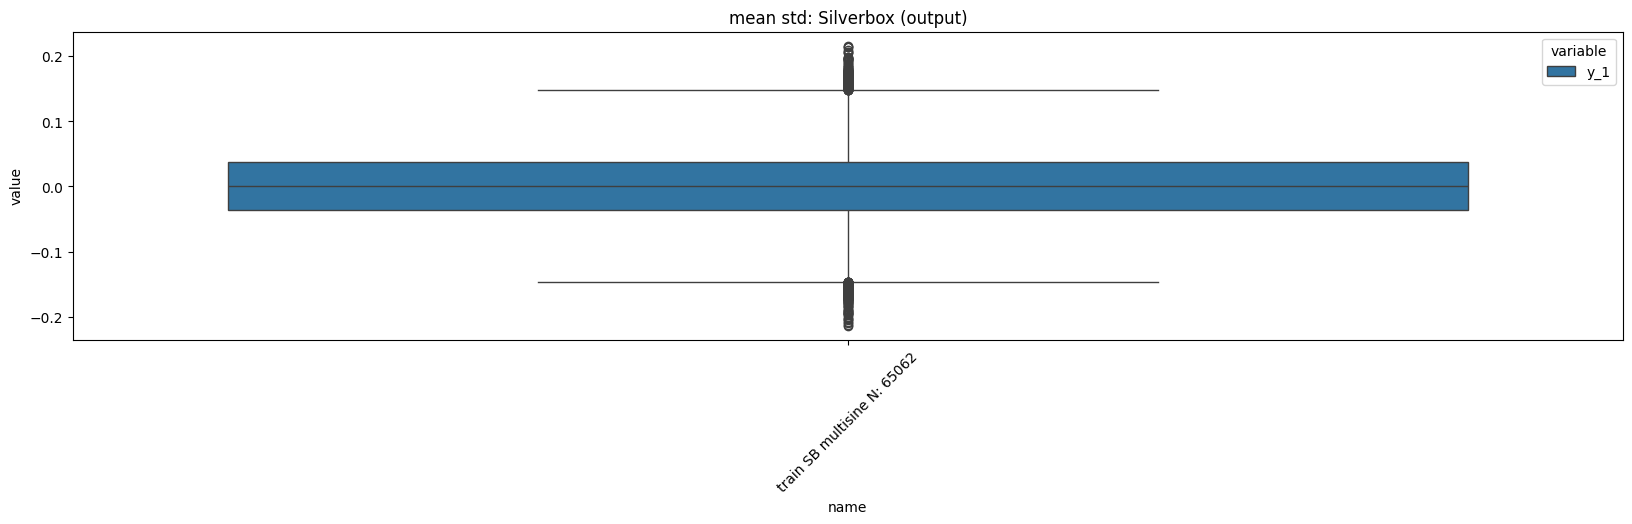

---WienerHammerBenchMark---
M train_val 1, M test 1


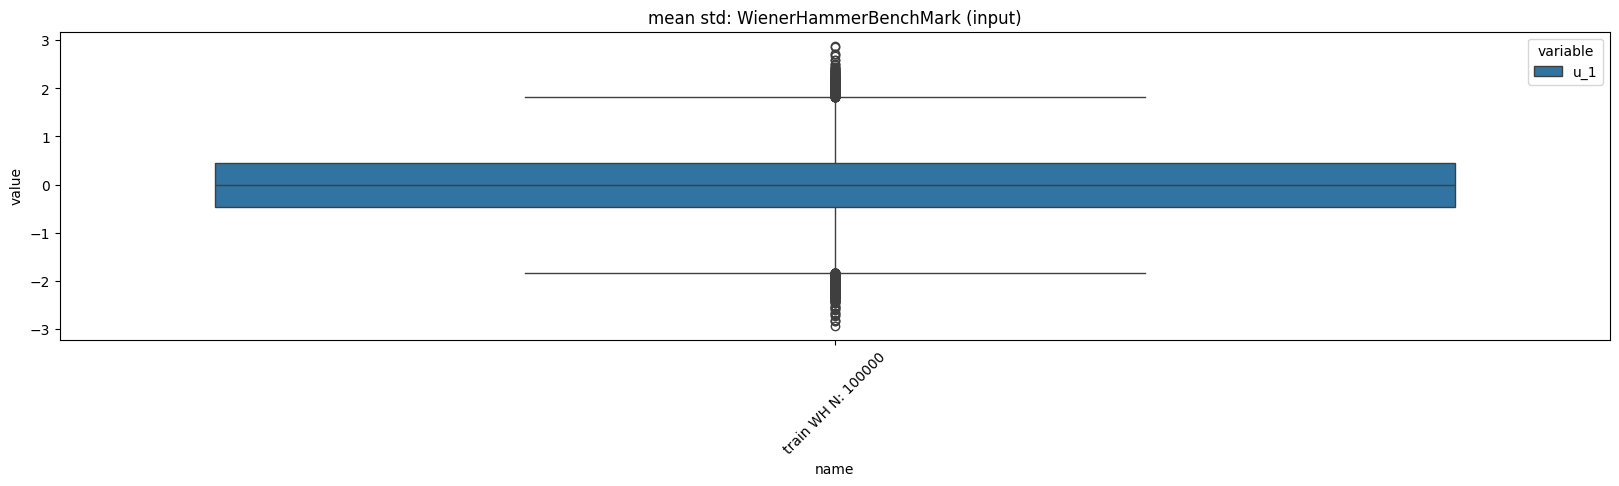

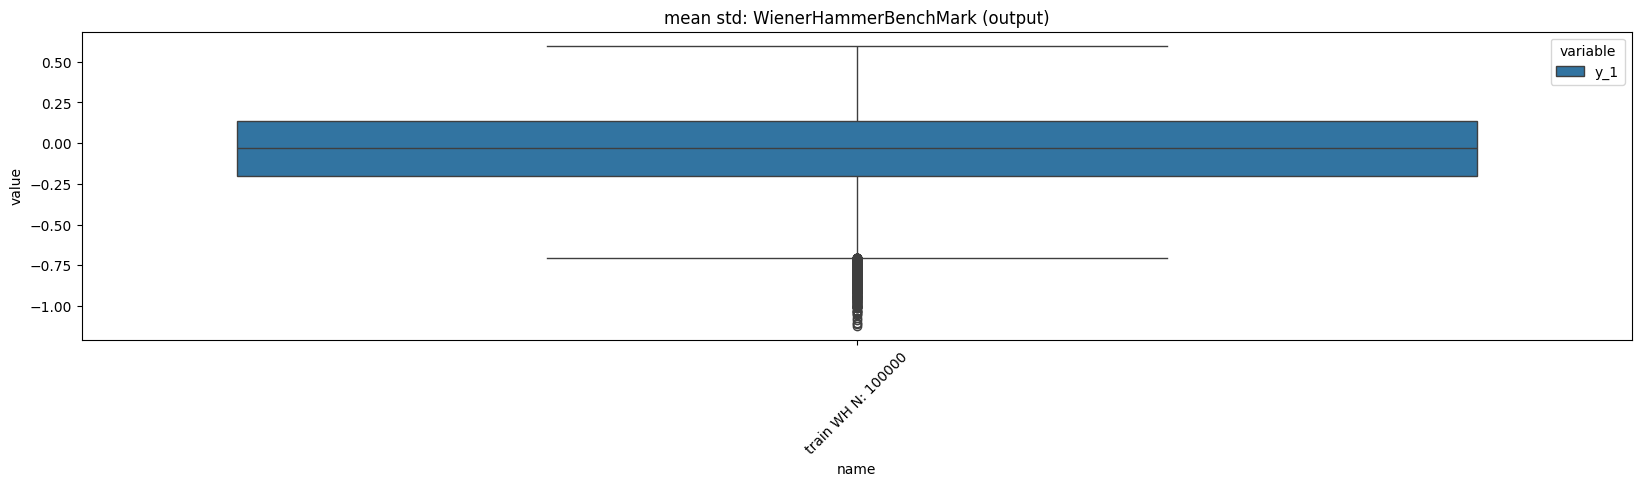

---ParWH---
M train_val 100, M test 5


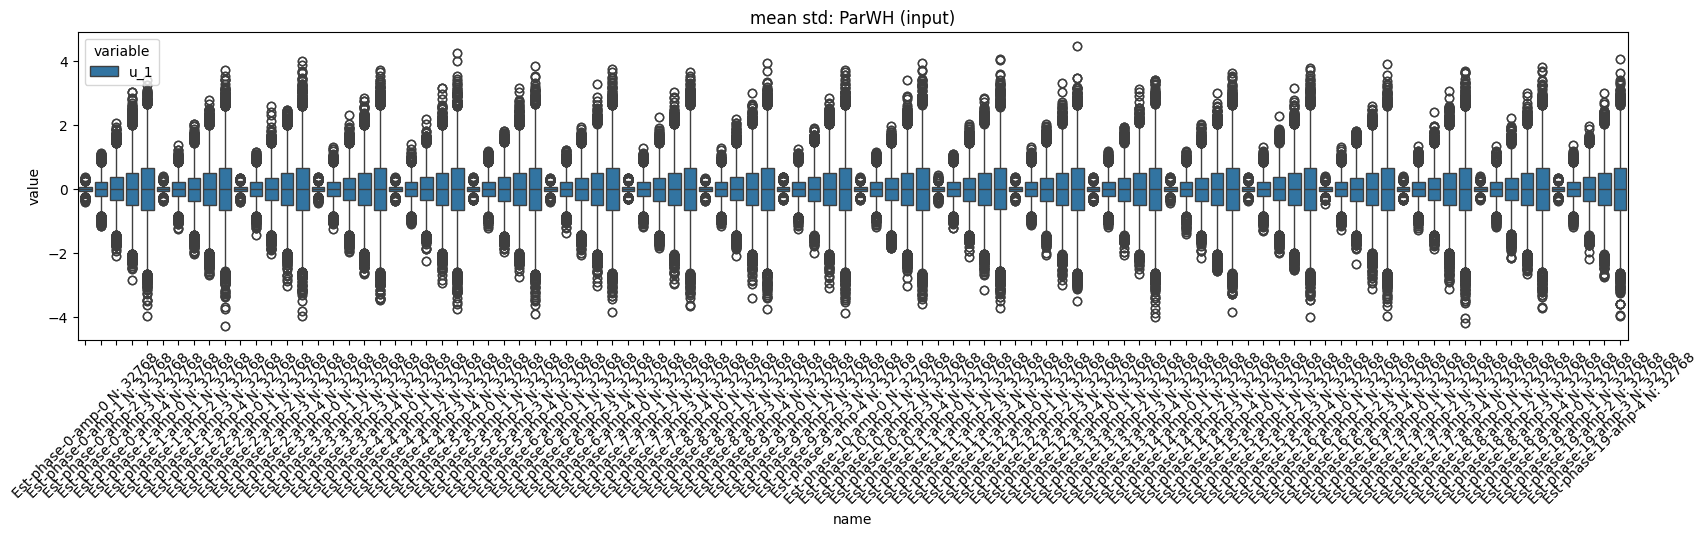

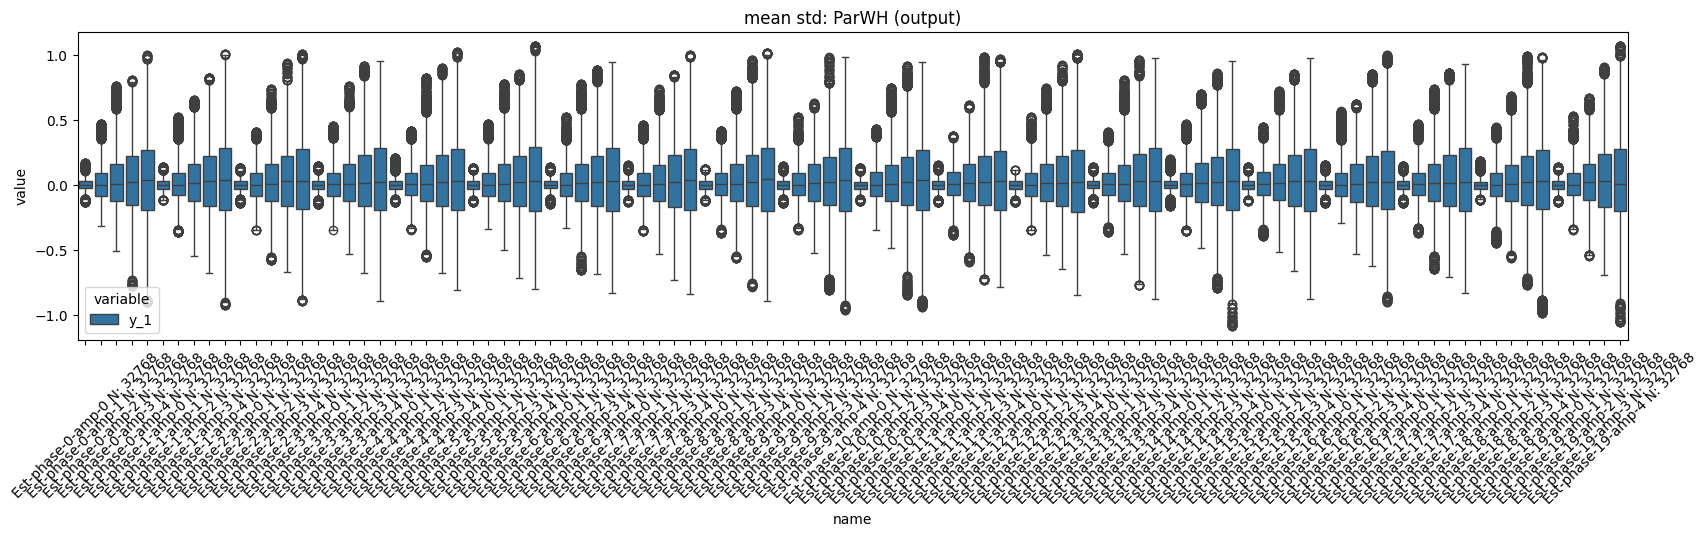

---F16---
M train_val 8, M test 6


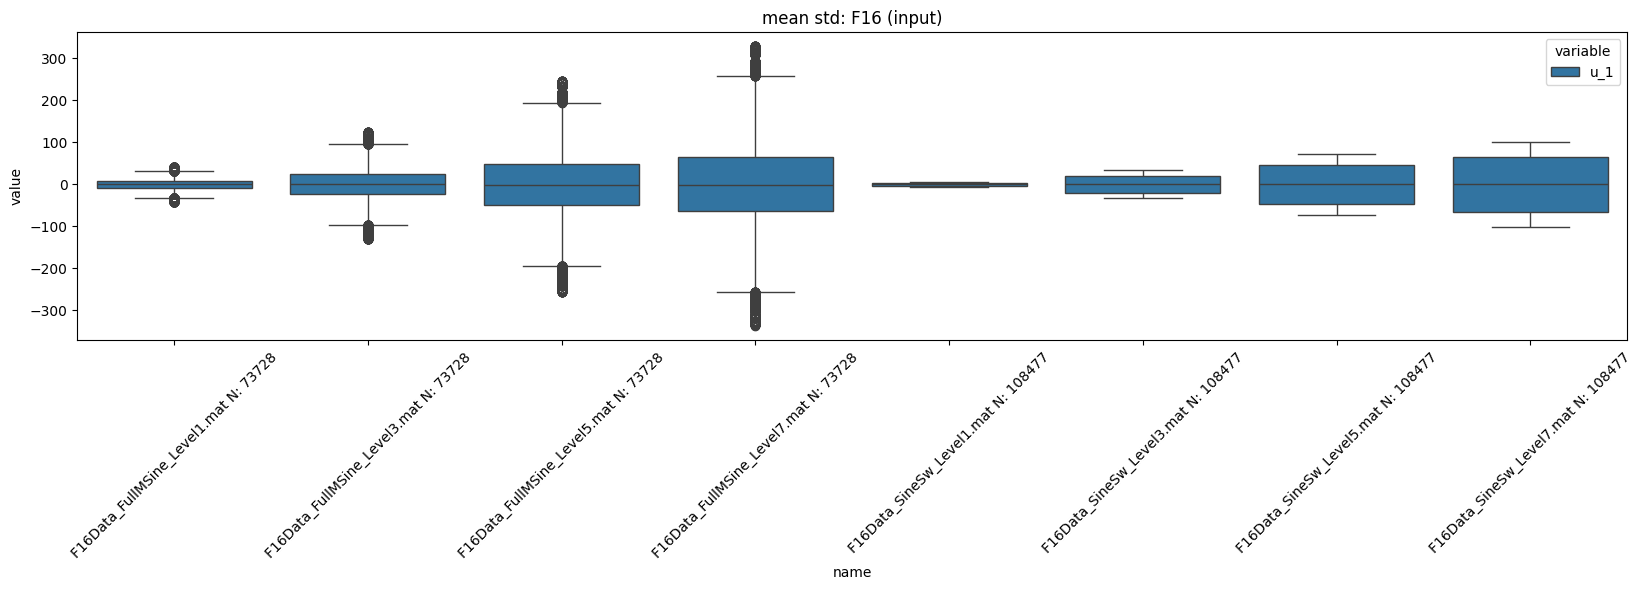

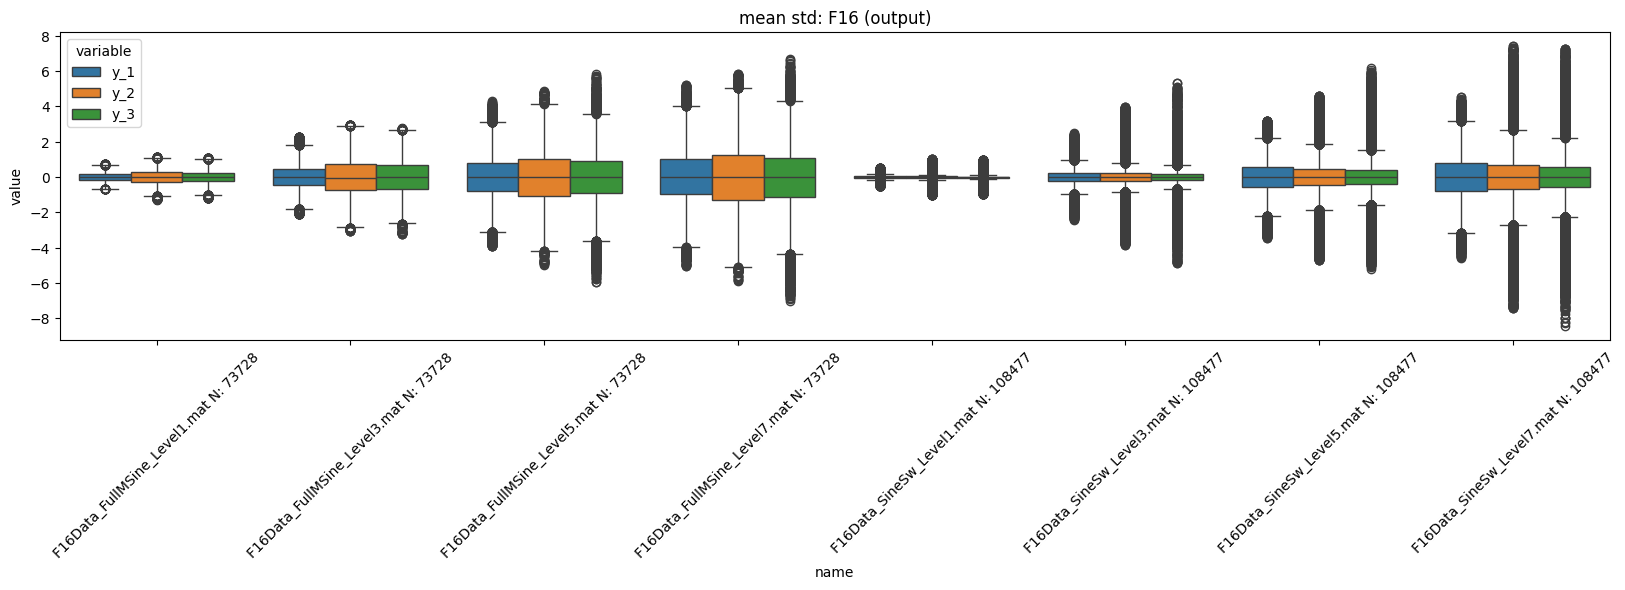

In [61]:
import pandas as pd
from typing import Tuple
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

names = ['CED', 'Cascaded_Tanks', 'EMPS', 'Silverbox', 'WienerHammerBenchMark', 'ParWH', 'F16']
for n in names:
    fcn = getattr(nonlinear_benchmarks, n)
    train_val, test = fcn(atleast_2d=True, always_return_tuples_of_datasets=True)

    print(f'---{fcn.__name__}---')
    print(f'M train_val {len(train_val)}, M test {len(test)}')
    _, nd = train_val[0].u.shape
    _, ne = train_val[0].y.shape
    input_names = [f'u_{idx+1}' for idx in range(nd)]
    output_names = [f'y_{idx+1}' for idx in range(ne)]

    # Create a combined DataFrame for all items in train_val
    all_data = []

    for t_v in train_val:
        N = t_v.u.shape[0]
        df = pd.DataFrame(np.hstack([t_v.u, t_v.y]), columns=input_names + output_names)
        df['name'] = f'{t_v.name} N: {N}'  # Add a column for the name
        all_data.append(df)

    # Concatenate all DataFrames into one
    combined_df = pd.concat(all_data)

    # Set up the plot
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.set_title(f'mean std: {fcn.__name__} (input)')

    # Use seaborn to create boxplots
    sns.boxplot(x='name', y='value', hue='variable', 
                data=pd.melt(combined_df, id_vars=['name'], value_vars=input_names), 
                ax=ax)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.savefig(f'./fig/{fcn.__name__}-input.pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

    # Set up the plot
    fig, ax = plt.subplots(figsize=(20, 4))
    ax.set_title(f'mean std: {fcn.__name__} (output)')

    # Use seaborn to create boxplots
    sns.boxplot(x='name', y='value', hue='variable', 
                data=pd.melt(combined_df, id_vars=['name'], value_vars=output_names), 
                ax=ax)
    

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    plt.savefig(f'./fig/{fcn.__name__}-output.pdf', bbox_inches='tight')

    # Show the plot
    plt.show()


In [50]:
df.describe()
df[output_names].mean().mean()



-2.337588396868876e-05

In [4]:
# split train and validation


# convert to internal data format

# make data loaders



In [15]:
import os
os.path.dirname(os.path.dirname(os.getcwd()))


'/Users/jack/Documents/01_Git/01_promotion/crnn'

In [6]:
from crnn.configuration.base import InputOutputList

In [25]:
a = InputOutputList([u_train], [y_train])
d,e = a

a = train_val.u.shape
b = ['1','2']
len(b)

2

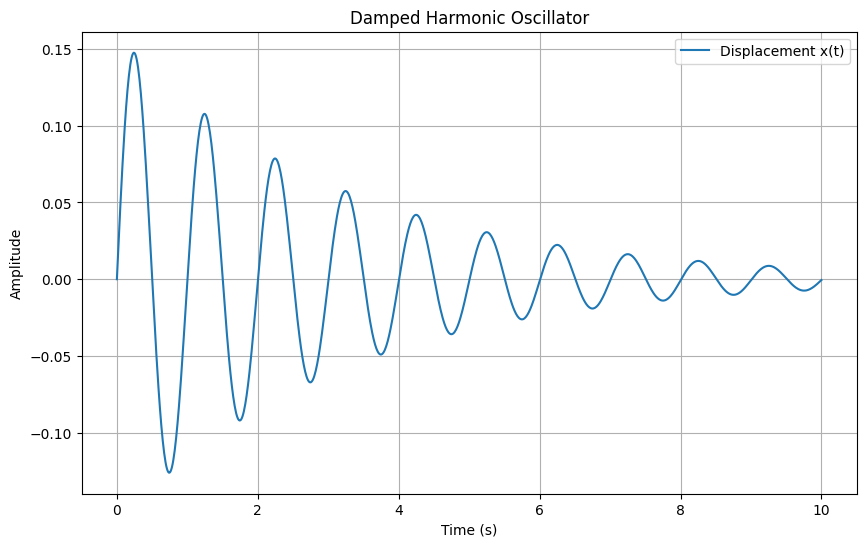

Mean: 0.0024
Variance: 0.0020
Skewness: 0.3045
Kurtosis: 1.6435


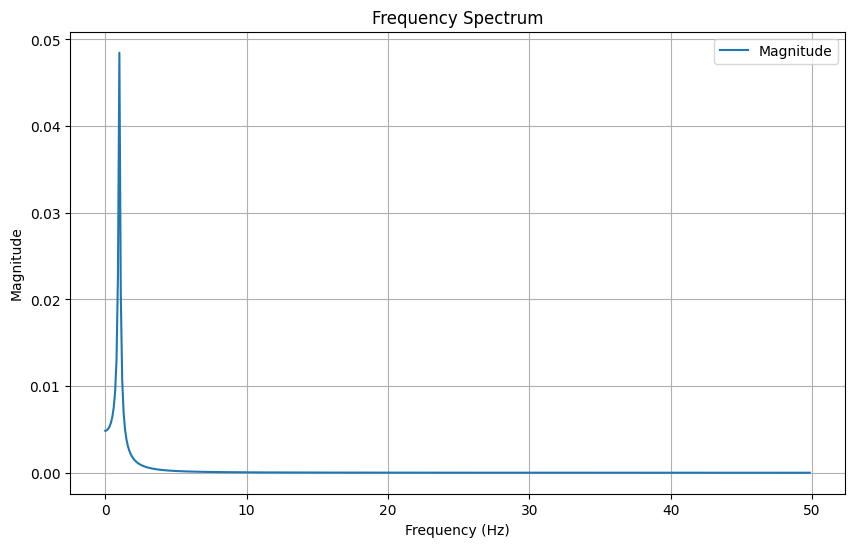

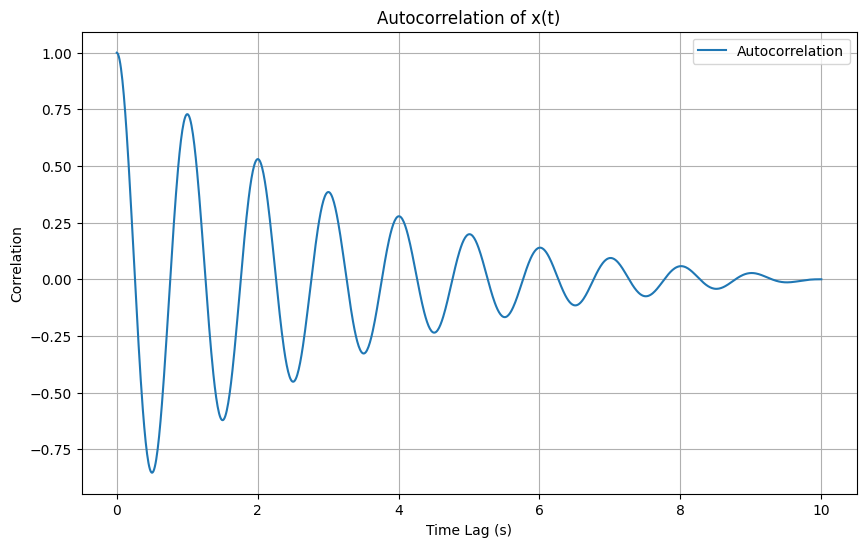

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import stats
from scipy.fft import fft, fftfreq

# Parameters
omega0 = 2 * np.pi * 1  # Natural frequency (1 Hz)
zeta = 0.05             # Damping ratio
t = np.linspace(0, 10, 1000)  # Time vector (10 seconds, 1000 samples)

# System transfer function
sys = signal.TransferFunction([1], [1, 2*zeta*omega0, omega0**2])

# Simulate the system (impulse response)
t, x = signal.impulse(sys, T=t)

# Plot the time-domain signal
plt.figure(figsize=(10, 6))
plt.plot(t, x, label="Displacement x(t)")
plt.title("Damped Harmonic Oscillator")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()
plt.legend()
plt.show()

# Statistics
mean_x = np.mean(x)
var_x = np.var(x)
skew_x = stats.skew(x)
kurt_x = stats.kurtosis(x)

print(f"Mean: {mean_x:.4f}")
print(f"Variance: {var_x:.4f}")
print(f"Skewness: {skew_x:.4f}")
print(f"Kurtosis: {kurt_x:.4f}")

# Frequency domain analysis
N = len(t)
xf = fft(x)
freqs = fftfreq(N, t[1] - t[0])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(freqs[:N // 2], 2.0 / N * np.abs(xf[:N // 2]), label="Magnitude")
plt.title("Frequency Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

# Autocorrelation
autocorr = np.correlate(x, x, mode='full')[len(x)-1:]
autocorr /= autocorr[0]  # Normalize

# Plot autocorrelation
plt.figure(figsize=(10, 6))
plt.plot(t, autocorr, label="Autocorrelation")
plt.title("Autocorrelation of x(t)")
plt.xlabel("Time Lag (s)")
plt.ylabel("Correlation")
plt.grid()
plt.legend()
plt.show()

Dominant Harmonic Components:
Frequency: 0.9990 Hz, Amplitude: 24.2352, Phase: -1.5501 rad


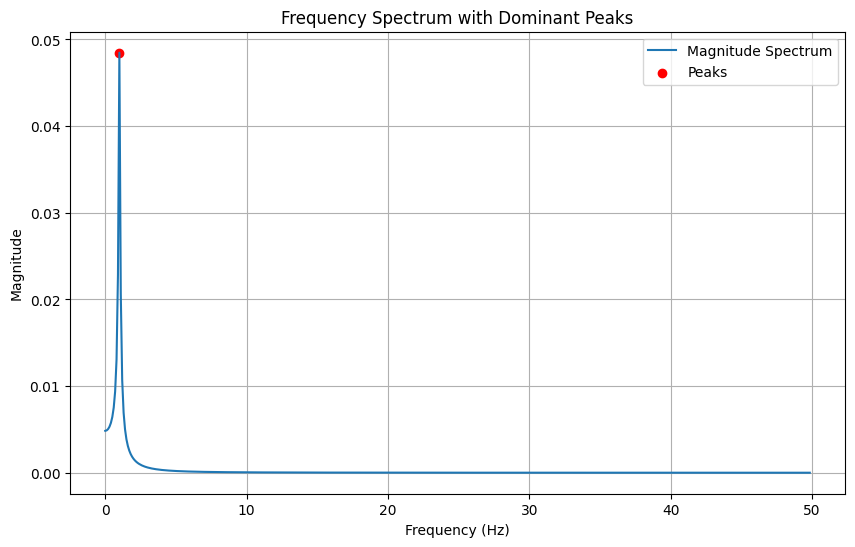

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft, fftfreq

# Parameters
omega0 = 2 * np.pi * 1  # Natural frequency (1 Hz)
zeta = 0.05             # Damping ratio
t = np.linspace(0, 10, 1000)  # Time vector (10 seconds, 1000 samples)

# System transfer function
sys = signal.TransferFunction([1], [1, 2*zeta*omega0, omega0**2])

# Simulate the system (impulse response)
t, x = signal.impulse(sys, T=t)

# Compute the FFT
N = len(t)
xf = fft(x)
freqs = fftfreq(N, t[1] - t[0])

# Get magnitudes and phases
magnitudes = np.abs(xf)  # Amplitude
phases = np.angle(xf)    # Phase (in radians)

# Find the dominant frequencies (peaks in the magnitude spectrum)
peak_indices = signal.find_peaks(magnitudes[:N // 2], height=0.1 * np.max(magnitudes))[0]
dominant_frequencies = freqs[peak_indices]
dominant_magnitudes = magnitudes[peak_indices]
dominant_phases = phases[peak_indices]

# Print the results
print("Dominant Harmonic Components:")
for i in range(len(dominant_frequencies)):
    print(f"Frequency: {dominant_frequencies[i]:.4f} Hz, "
          f"Amplitude: {dominant_magnitudes[i]:.4f}, "
          f"Phase: {dominant_phases[i]:.4f} rad")

# Plot the frequency spectrum with peaks
plt.figure(figsize=(10, 6))
plt.plot(freqs[:N // 2], 2.0 / N * magnitudes[:N // 2], label="Magnitude Spectrum")
plt.scatter(dominant_frequencies, 2.0 / N * dominant_magnitudes, color='red', label="Peaks")
plt.title("Frequency Spectrum with Dominant Peaks")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid()
plt.legend()
plt.show()

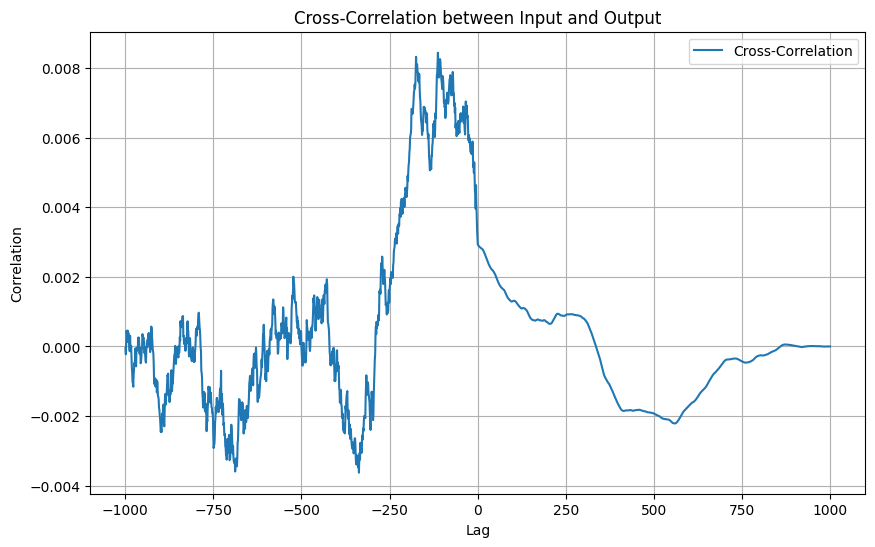

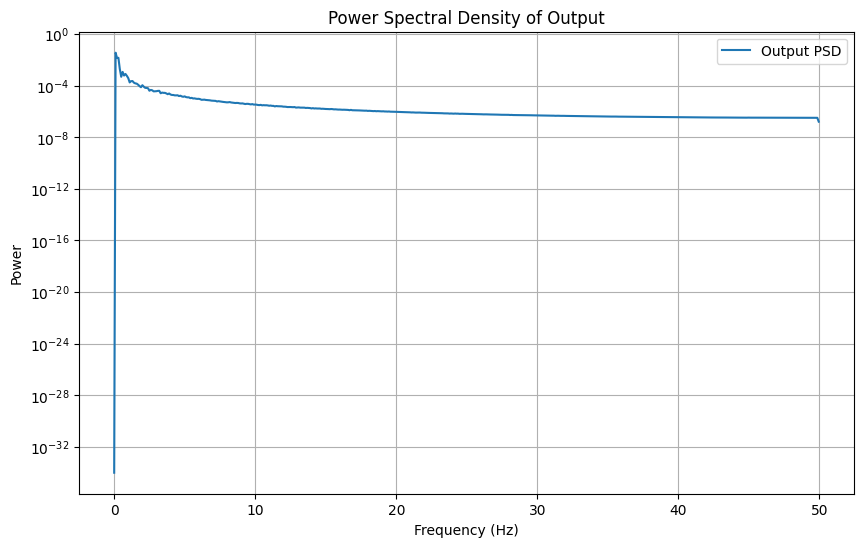

Rank of data matrix: 4


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate, periodogram

# Generate input-output data (example: linear system)
N = 1000  # Number of samples
t = np.linspace(0, 10, N)
u = np.random.normal(0, 1, N)  # White noise input
G = signal.TransferFunction([1], [1, 0.5, 1])  # Example system
t, y, _ = signal.lsim(G, U=u, T=t)  # Simulate output

# Compute cross-correlation
cross_corr = correlate(u, y, mode='full') / N
lags = np.arange(-N + 1, N)

# Plot cross-correlation
plt.figure(figsize=(10, 6))
plt.plot(lags, cross_corr, label="Cross-Correlation")
plt.title("Cross-Correlation between Input and Output")
plt.xlabel("Lag")
plt.ylabel("Correlation")
plt.grid()
plt.legend()
plt.show()

# Compute Power Spectral Density (PSD) of output
f, PSD = periodogram(y, fs=1/(t[1]-t[0]))

# Plot PSD
plt.figure(figsize=(10, 6))
plt.semilogy(f, PSD, label="Output PSD")
plt.title("Power Spectral Density of Output")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power")
plt.grid()
plt.legend()
plt.show()

# Check rank of data matrix (for ARX model)
n = 2  # System order
Phi = np.column_stack([-np.roll(y, i) for i in range(1, n+1)] + [np.roll(u, i) for i in range(1, n+1)])
rank = np.linalg.matrix_rank(Phi)
print(f"Rank of data matrix: {rank}")